## Домашнее задание

Реализовать классификацию цветков Ириса, используя функцию ошибки *Hinge loss*:

$[M_i<0] \leqslant max(0,1 - M_i)$

In [1]:
from classification_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

In [2]:
X, kind_iris = get_data()

In [3]:
y = kind_iris.copy()
y[y=='iris setosa'] = -1
y[y=='iris virginica'] = 1
y = y.astype(int)

In [4]:
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = create_data(X)

In [5]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.2034649  0.32676871 0.78228663]


\begin{equation*}
g(M_i) = max(0,1 - M_i) \\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N max(0,1 - M_i) \\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N max(0,1 - y_iX_i\Theta) \\
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} =  \dfrac{1}{N}\sum_{i=1}^N\dfrac{\partial \tilde L_{i}(\Theta)}{\partial \theta_j} \\
\dfrac{\partial \tilde L_{i}(\Theta)}{\partial \theta_j} = 
\begin{cases}
-y_ix_{i,j}, &\text{$y_iX_i\Theta$ < 1} \\
0,  &\text{$y_iX_i\Theta \geqslant 1$}
\end{cases}
\end{equation*}

In [6]:
def gradient_function(Theta, X_train, y):
    grad = np.zeros_like(Theta)
    #Ваш код здесь
    #--------------------------
    M = y * (X_train @ Theta)
    for j in range(Theta.shape[0]):
        grad_j = -y*X_train[:,j]
        grad_j[M >=1] = 0
        grad[j] += np.mean(grad_j)
    #--------------------------
    return grad

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  

In [7]:
def gradient_descent(Theta, X_train, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X_train, y)
    return theta

In [8]:
theta_opt = gradient_descent(Theta, X_train, y, 0.01, 1000)

In [9]:
def predict_function(X_train, theta):
    y_pred = np.dot(X_train, theta) #X @ Theta
    return np.sign(y_pred)

y_pred = predict_function(X_train, theta_opt)

In [10]:
def error(y, y_pred):
    return np.mean(y_pred != y)
error(y, y_pred)

0.01

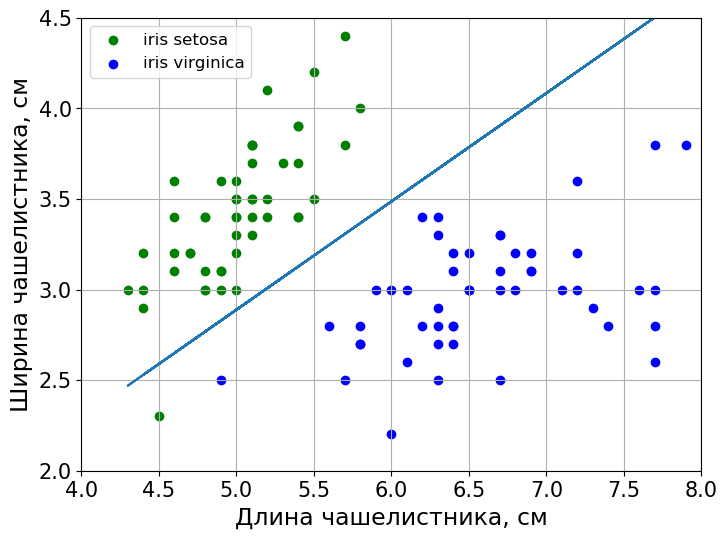

In [11]:
plot_finaly_trained_model(X, kind_iris, theta_opt)